This notebook applies a model trained by trainCNN.ipynb to a distinct geographical area that was not present in the model training data.

In [6]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from sklearn.metrics import classification_report

In [2]:
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
import utils

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the labelled data

region = "Chiapas"
cat1 = np.load(f'/content/drive/MyDrive/CAFO_data/Mexico/{region}_cat1_edited.npy')
cat0 = np.load(f'/content/drive/MyDrive/CAFO_data/Mexico/{region}_cat0_edited.npy')

# Combine all the farm and not-farm images into a single array
X = np.concatenate([cat1, cat0], axis=0)

# Create an array of image labels
labels_cat1 = np.ones(len(cat1))
labels_cat0 = np.zeros(len(cat0))
y = np.concatenate([labels_cat1, labels_cat0], axis=0)
y = to_categorical(y, num_classes=2)

X_original = np.copy(X)

In [4]:
# load the trained model

model = load_model('/content/drive/MyDrive/CAFO_models/VGG16_step2.keras')

In [20]:
y_prob, y_class = utils.get_predictions(model, X)
df = utils.collect_results(y_prob, y)

5/5 [==============================] - 11s 2s/step


In [21]:
print('\n', classification_report(y, y_class))


               precision    recall  f1-score   support

           0       0.77      0.87      0.82        69
           1       0.86      0.75      0.80        72

   micro avg       0.81      0.81      0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141
 samples avg       0.81      0.81      0.81       141



In [25]:
utils.plot_classified_images(X, df)

Output hidden; open in https://colab.research.google.com to view.

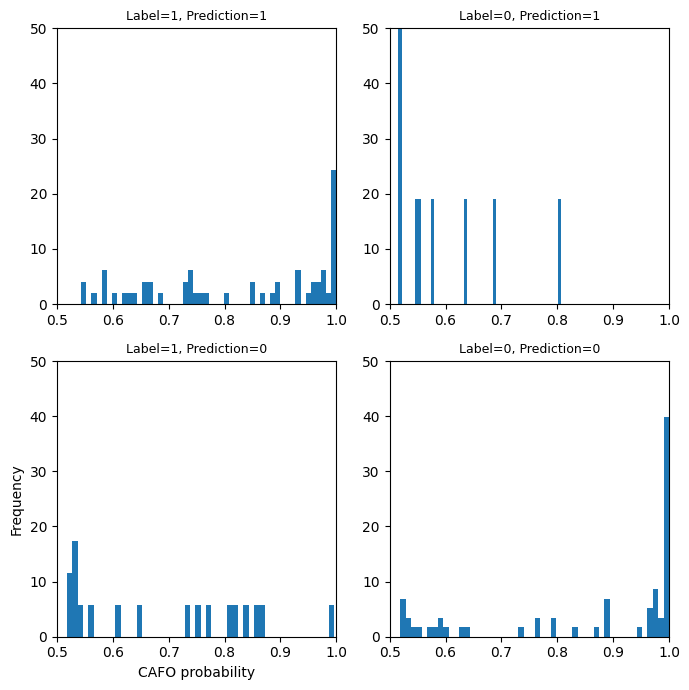

In [26]:
utils.probability_hist(df)